# Welcome to my Python 101

In [236]:
i=1
print(i)

1


Let us try to put a formulla like $phi = K_P \cdot p$

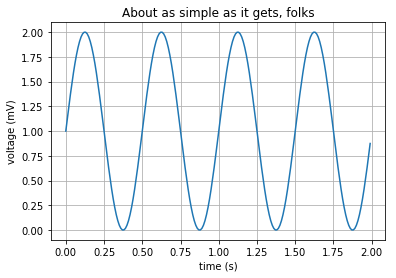

In [237]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(4 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

## Interpolate

 - this
 - is
 - a
 - list

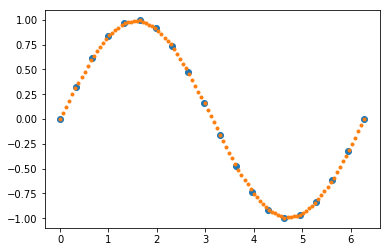

In [238]:
x = np.linspace(0, 2 * np.pi, 20)
y = np.sin(x)
yp = None
xi = np.linspace(x[0], x[-1], 100)
yi = np.interp(xi, x, y, yp)

fig, ax = plt.subplots()
ax.plot(x, y, 'o', xi, yi, '.')
plt.show()

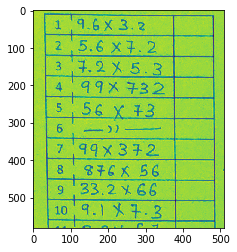

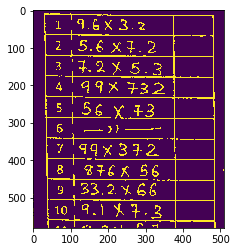

In [239]:
import cv2


img = cv2.imread("test3.jpg", 0)


(thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
img_bin = 255-img_bin 

plt.imshow(img)
plt.show()

plt.imshow(img_bin)
plt.show()



Now detect the boxes

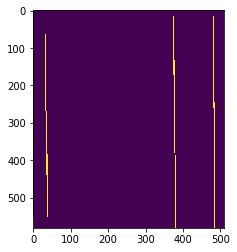

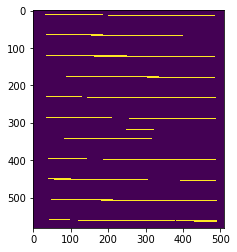

In [240]:
# Defining a kernel length
kernel_length = np.array(img).shape[1]//25
 
# A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))

# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)


plt.imshow(verticle_lines_img)
plt.show()
plt.imshow(horizontal_lines_img)
plt.show()


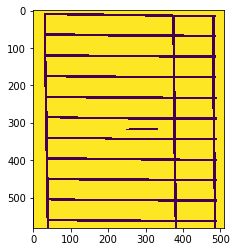

In [241]:
# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(img_final_bin)
plt.show()

[36, 371] [67, 120]


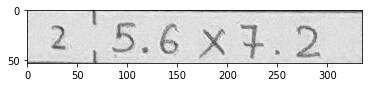

[36, 371] [123, 175]


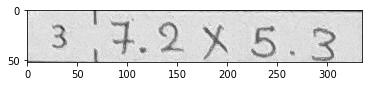

[37, 372] [177, 230]


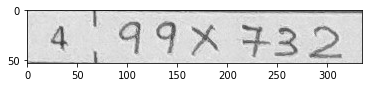

[38, 373] [233, 285]


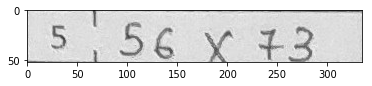

[39, 373] [288, 340]


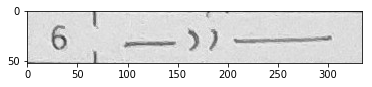

[40, 374] [343, 395]


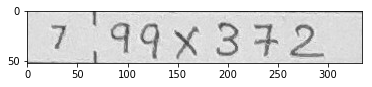

[42, 375] [452, 504]


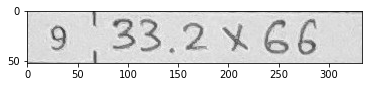

[41, 375] [398, 450]


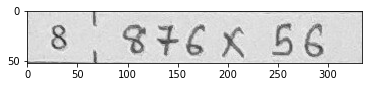

[43, 376] [506, 558]


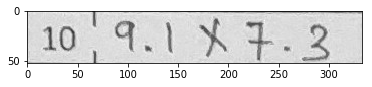

[34, 370] [13, 65]


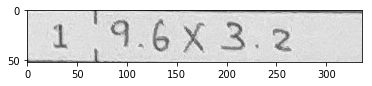

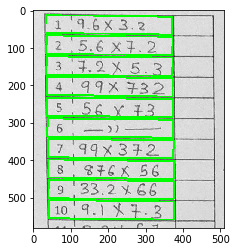

In [242]:
# Find contours for image, which will detect all the boxes
contours = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Sort all the contours by top to bottom.
#(contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")

#print(im2)
#print(contours)

#for c in contours:
#    print(c[0])
    
#cv2.copyImage(img,final)
#    cv2.drawContours(img, c, -1, (0,0,0), 5)
    
#cv2.drawContours(img, contours, -1, (0,0,0), 5)

#plt.imshow(img)
#plt.show()

cnts = imutils.grab_contours(contours)

# draw a bounding box arounded the detected barcode and display the
# image
result = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

cc = sorted(cnts, key = cv2.contourArea, reverse = True)

i=0

for c in cc:
    # compute the rotated bounding box of the largest contour
    rect = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
    box = np.int0(box)
    
    dx = abs(box[0][0] - box[2][0])
    dy = abs(box[0][1] - box[2][1])
    #print(dx,dy)
    
    i = i + 1
    if (dx > 200) & (dx < 500) & (dy > 30):
        cv2.drawContours(result, [box], -1, (0, 255, 0), 3)
        i = i + 1
        dx = sorted((box[0][0] , box[2][0]) )
        dy = sorted((box[0][1] , box[2][1]) )
        print(dx, dy)
        b = cv2.cvtColor(img[dy[0]:dy[1],dx[0]:dx[1] ], cv2.COLOR_RGB2BGR)
        plt.imshow(b)
        plt.show()

plt.imshow(result)
plt.show()

## Barcode

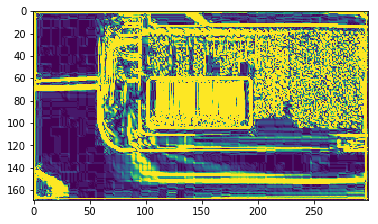

In [243]:
import imutils
import cv2

# load the image and convert it to grayscale
image = cv2.imread('barcode_02.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# compute the Scharr gradient magnitude representation of the images
# in both the x and y direction using OpenCV 2.4
ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)
 
# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

plt.imshow(gradient)
plt.show()

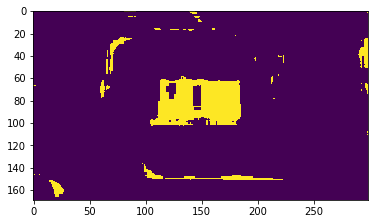

In [244]:
# blur and threshold the image
blurred = cv2.blur(gradient, (9, 9))
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

plt.imshow(thresh)
plt.show()

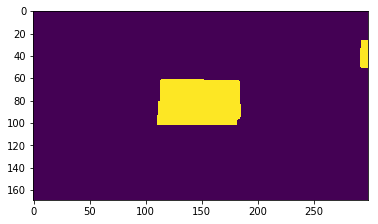

In [245]:

33
# construct a closing kernel and apply it to the thresholded image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)


36
37
# perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)

plt.imshow(closed)
plt.show()

In [246]:
# find the contours in the thresholded image, then sort the contours
# by their area, keeping only the largest one
cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
 
# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
box = np.int0(box)
 
# draw a bounding box arounded the detected barcode and display the
# image
result = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
cv2.drawContours(result, [box], -1, (0, 255, 0), 3)

array([[[251, 255, 255],
        [234, 244, 246],
        [244, 255, 255],
        ...,
        [248, 255, 255],
        [248, 251, 255],
        [252, 254, 255]],

       [[240, 250, 252],
        [132, 146, 147],
        [ 96, 116, 115],
        ...,
        [ 91,  99, 120],
        [138, 143, 162],
        [242, 246, 255]],

       [[244, 255, 255],
        [ 99, 119, 118],
        [ 48,  74,  71],
        ...,
        [ 40,  52,  76],
        [ 96, 107, 127],
        [248, 255, 255]],

       ...,

       [[249, 249, 249],
        [ 74,  74,  74],
        [  0,   0,   0],
        ...,
        [113, 112, 110],
        [142, 141, 139],
        [251, 250, 248]],

       [[255, 255, 255],
        [106, 106, 106],
        [ 58,  58,  58],
        ...,
        [111, 110, 108],
        [141, 140, 138],
        [251, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 254, 252],
        [255, 254, 252],
        [255, 253, 254]]

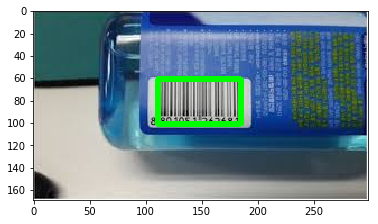

In [247]:
plt.imshow(result)
plt.show()